In [3]:
import pandas as pd
import datetime as dt
from pathlib import Path
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import model_from_json

2023-03-29 16:59:58.467176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


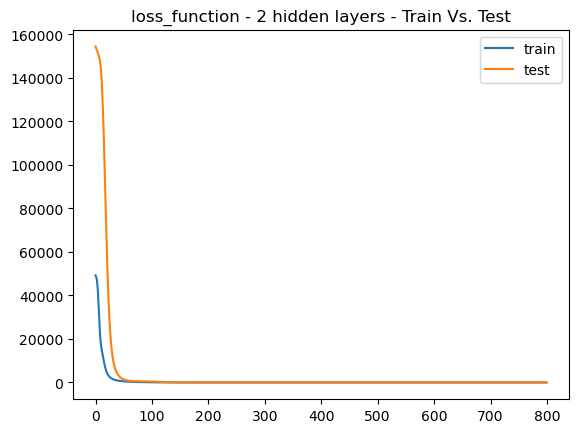

73/73 [==============================] - 3s 21ms/step


,Open,High,Low,Volume,Day,Weekday,Week,Month,Year,Close,predicted
Date,,,,,,,,,,,
2023-02-14,411.239990,415.049988,408.510010,88389300,14,1,7,2,2023,412.640015,411.996063
2023-02-15,410.350006,414.059998,409.470001,61555700,15,2,7,2,2023,413.980011,412.339966
2023-02-16,408.790008,412.910004,408.140015,76431500,16,3,7,2,2023,408.279999,411.321198
2023-02-17,406.059998,407.510010,404.049988,89257800,17,4,7,2,2023,407.260010,406.113800
2023-02-21,403.059998,404.160004,398.820007,82655900,21,1,8,2,2023,399.089996,401.103516
2023-02-22,399.519989,401.130005,397.019989,83742300,22,2,8,2,2023,398.540008,399.119171
2023-02-23,401.559998,402.200012,396.250000,96242400,23,3,8,2,2023,400.660004,398.910797
2023-02-24,395.420013,397.250000,393.640015,108194400,24,4,8,2,2023,396.380005,395.870667
2023-02-27,399.869995,401.290008,396.750000,80444700,27,0,9,2,2023,397.730011,398.654144


73/73 [==============================] - 1s 15ms/step - loss: 2.0694 - mse: 2.0694
rmse is :1.4385545969735636
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 11)                110       
                                                                 
 dense_19 (Dense)            (None, 11)                132       
                                                                 
 dense_20 (Dense)            (None, 1)                 12        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
def perform_dnn_on_spy_data():
    spy_df = pd.read_csv(Path("./Resources/spy.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
    spy_df = spy_df[["Open","High","Low","Volume","Day","Weekday","Week","Month","Year","Close"]]
    X = spy_df.drop(columns=["Close"])
    y = spy_df["Close"]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    dnn = Sequential()
    # Create the first hidden layer
    dnn.add(Dense(units=11, input_dim=9, activation="relu"))
    # Create the second hidden layer
    dnn.add(Dense(units=11, activation="relu"))
    # Create the Output layer
    dnn.add(Dense(units=1, activation="linear"))
    # Compile the model 
    # Set the parameters as mean_squared_error, adam, and mse.
    dnn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
    # Fit the model
    model = dnn.fit(X, y, validation_split=0.3, epochs=800, verbose=0)
    # Plot the loss function of the training results for the two models
    plt.plot(model.history["loss"])
    plt.plot(model.history["val_loss"])
    plt.title("loss_function - 2 hidden layers - Train Vs. Test")
    plt.legend(["train", "test"])
    plt.show()
    import json
    # Save model as JSON
    dnn_json = dnn.to_json()
    file_path = Path("./Resources/model_spy.json")
    with open(file_path, "w") as json_file:
      json_file.write(dnn_json)
    file_path = "./Resources/model_spy.h5"
    dnn.save_weights("./Resources/model_spy.h5")
    file_path = Path("./Resources/model_spy.json")
    with open(file_path, "r") as json_file:
       model_json = json_file.read()
    loaded_model = model_from_json(model_json)
    # load weights into new model
    file_path = "./Resources/model_spy.h5"
    loaded_model.load_weights(file_path)
    # Make some predictions with the loaded model
    spy_df["predicted"] = loaded_model.predict(X)
    display(spy_df.tail(10))
    model_loss , model_accuracy = dnn.evaluate(X,y)
    #print(f"model accuracy is {model_accuracy}")
    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y, spy_df["predicted"] , squared=False)
    print(f"rmse is :{rmse}")
    print(dnn.summary())
   
perform_dnn_on_spy_data()



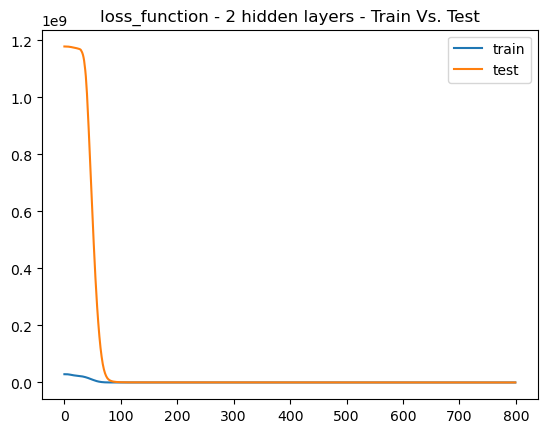

84/84 [==============================] - 0s 2ms/step


,Open,High,Low,Volume,Adj Close,Close,predicted
Date,,,,,,,
2022-01-11,41819.50781,43001.15625,41407.75391,2.632765e+10,42735.85547,42735.85547,42655.902344
2022-01-12,42742.17969,44135.36719,42528.98828,3.349994e+10,43949.10156,43949.10156,43878.441406
2022-01-13,43946.74219,44278.42188,42447.04297,4.769114e+10,42591.57031,42591.57031,42629.523438
2022-01-14,42598.87109,43346.68750,41982.61719,2.357740e+10,43099.69922,43099.69922,42984.562500
2022-01-15,43101.89844,43724.67188,42669.03516,1.837135e+10,43177.39844,43177.39844,43144.320312
2022-01-16,43172.03906,43436.80859,42691.02344,1.790210e+10,43113.87891,43113.87891,43027.828125
2022-01-17,43118.12109,43179.39063,41680.32031,2.169090e+10,42250.55078,42250.55078,42153.300781
2022-01-18,42250.07422,42534.40234,41392.21484,2.241721e+10,42375.63281,42375.63281,42208.578125
2022-01-19,42374.03906,42478.30469,41242.91406,2.309154e+10,41744.32813,41744.32813,41651.496094


84/84 [==============================] - 1s 10ms/step - loss: 4417.4956 - mse: 4417.4956
model accuracy is 4417.49560546875
rmse is :66.46428384105462
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                66        
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
def perform_dnn_on_bitcoin_data():
    bitcoin_df = pd.read_csv(Path("./Resources/bitcoin.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
    bitcoin_df = bitcoin_df[["Open","High","Low","Volume","Adj Close","Close"]]
    X = bitcoin_df.drop(columns=["Close"])
    y = bitcoin_df["Close"]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    dnn = Sequential()
    # Create the first hidden layer
    dnn.add(Dense(units=11, input_dim=5, activation="relu"))
    # Create the second hidden layer
    dnn.add(Dense(units=11, activation="relu"))
    # Create the Output layer
    dnn.add(Dense(units=1, activation="linear"))
    # Compile the model 
    # Set the parameters as mean_squared_error, adam, and mse.
    dnn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
    # Fit the model
    model = dnn.fit(X, y, validation_split=0.3, epochs=800, verbose=0)
    # Plot the loss function of the training results for the two models
    plt.plot(model.history["loss"])
    plt.plot(model.history["val_loss"])
    plt.title("loss_function - 2 hidden layers - Train Vs. Test")
    plt.legend(["train", "test"])
    plt.show()
    import json
    # Save model as JSON
    dnn_json = dnn.to_json()
    file_path = Path("./Resources/model_bitcoin.json")
    with open(file_path, "w") as json_file:
      json_file.write(dnn_json)
    file_path = "./Resources/model_bitcoin.h5"
    dnn.save_weights("./Resources/model_bitcoin.h5")
    file_path = Path("./Resources/model_bitcoin.json")
    with open(file_path, "r") as json_file:
       model_json = json_file.read()
    loaded_model = model_from_json(model_json)
    # load weights into new model
    file_path = "./Resources/model_bitcoin.h5"
    loaded_model.load_weights(file_path)
    # Make some predictions with the loaded model
    bitcoin_df["predicted"] = loaded_model.predict(X)
    display(bitcoin_df.tail(10))
    model_loss , model_accuracy = dnn.evaluate(X,y)
    print(f"model accuracy is {model_accuracy}")
    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y, bitcoin_df["predicted"] , squared=False)
    print(f"rmse is :{rmse}")
    print(dnn.summary())
perform_dnn_on_bitcoin_data()
